In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import streamlit as st





In [3]:
st.set_page_config(page_title="Supermarket Deshbord",page_icon=":bar_chart:")

In [4]:
st.title("Supermarket Deshbord :bar_chart:")

2024-01-12 10:41:36.282 
  command:

    streamlit run c:\Users\lenovo\miniconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [7]:
file_path = r'streamapp.csv'
df = pd.read_csv(file_path, index_col=0)

In [56]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,gross margin percentage,gross income,Rating,Month,Year,Week,Weekday
Invoice ID,,,,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,4.761905,26.1415,9.1,January,2019,5,Saturday
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,4.761905,3.8200,9.6,March,2019,4,Friday
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,4.761905,16.2155,7.4,March,2019,6,Sunday
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,4.761905,23.2880,8.4,January,2019,6,Sunday
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,4.761905,30.2085,5.3,February,2019,4,Friday


In [26]:
df = df.drop(columns='cogs')

In [29]:
df['Date']=pd.to_datetime(df['Date'])

In [44]:
df['Month']=df['Date'].dt.month


In [46]:
df['Month'] = df['Date'].dt.strftime('%B')

In [49]:
df['Year']=df['Date'].dt.year

In [32]:
df['Week']=df['Date'].dt.weekday

In [50]:
df['Weekday'] = df['Date'].dt.strftime('%A')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10820\1941112187.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, ci=None, ax=ax1)


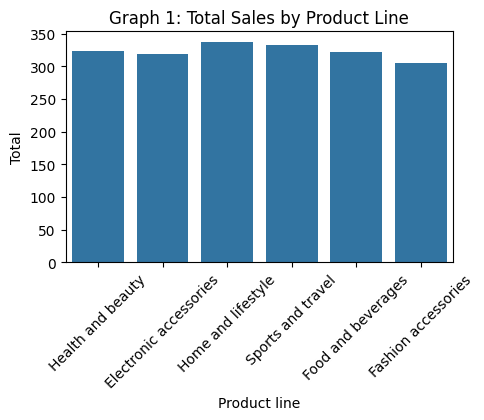

In [62]:
fig1, ax1 = plt.subplots(figsize=(5, 3))
sns.barplot(x='Product line', y='Total', data=df, ci=None, ax=ax1)
plt.xticks(rotation=45)
plt.title("Graph 1: Total Sales by Product Line")
plt.show(fig1)

In [64]:
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()
monthly_sales

,Month,Total
0,February,97219.374
1,January,116291.868
2,March,109455.507


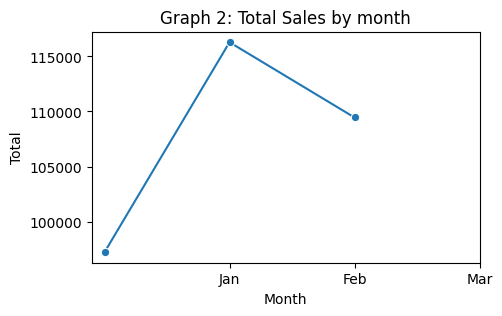

In [81]:
fig2,ax2=plt.subplots(figsize=(5,3))
sns.lineplot(x='Month', y='Total', data=monthly_sales, marker='o', ax=ax2)
plt.xticks(range(1, 4), ['Jan', 'Feb', 'Mar'])
plt.title("Graph 2: Total Sales by month")
plt.show(fig2)

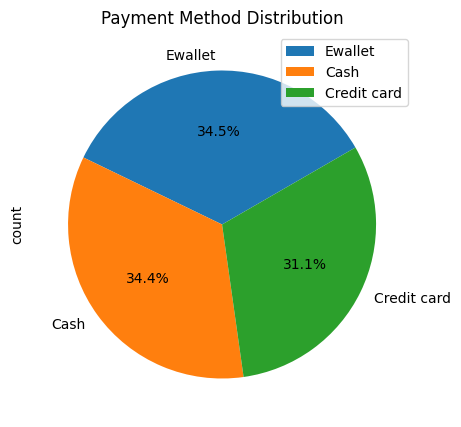

In [100]:
fig3, ax3 = plt.subplots(figsize=(5, 5))
df['Payment'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax3,startangle=30)
plt.legend(df['Payment'])
plt.title("Payment Method Distribution")
plt.show(fig3)


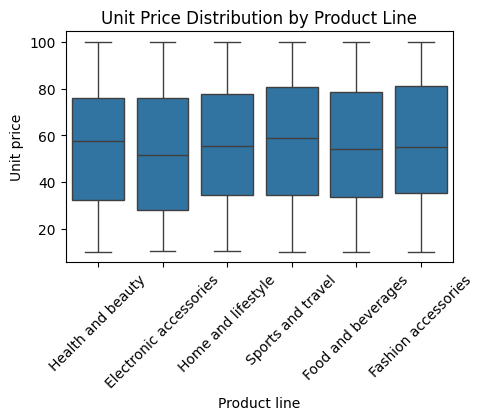

In [102]:
"Graph 4: Unit Price Distribution by Product Line"
fig4, ax4 = plt.subplots(figsize=(5, 3))
sns.boxplot(x='Product line', y='Unit price', data=df, ax=ax4)
plt.title("Unit Price Distribution by Product Line")
plt.xticks(rotation=45)
plt.show(fig4)

In [167]:
filter=df.groupby('Product line')['Quantity'].sum().reset_index()
filter

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


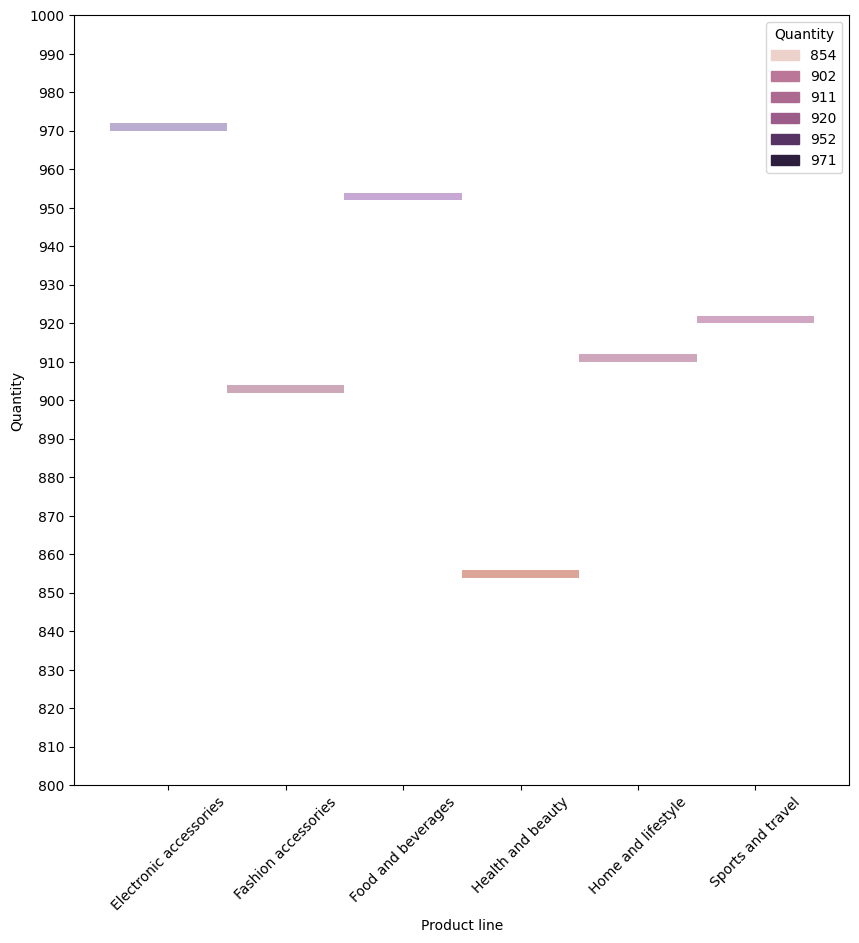

In [181]:
"Graph 5: Quantity Distribution"
fig5, ax5 = plt.subplots(figsize=(10, 10))
filter=df.groupby('Product line')['Quantity'].sum().reset_index()
sns.histplot(filter,x='Product line',y='Quantity',binwidth=2,kde=True,stat='frequency',ax=ax5,fill=True,element='bars',hue='Quantity')
plt.xticks(rotation=45)
plt.yticks(range(800,1001,10))
plt.show(fig5)

In [192]:
df["Unit price"].to_string()
fil2=df.groupby('Unit price')['Quantity'].sum().reset_index()

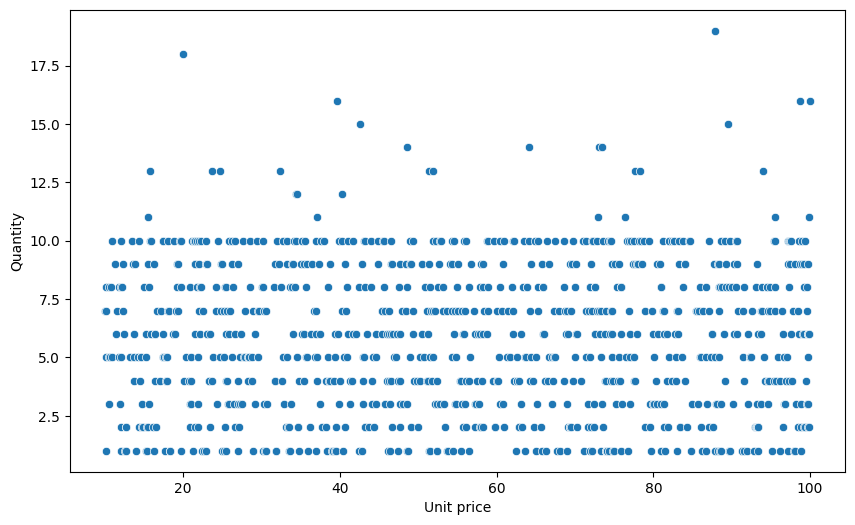

In [195]:
fig6, ax6 = plt.subplots(figsize=(10, 6))

sns.scatterplot(x='Unit price', y='Quantity', data=fil2, ax=ax6)
plt.show(fig6)

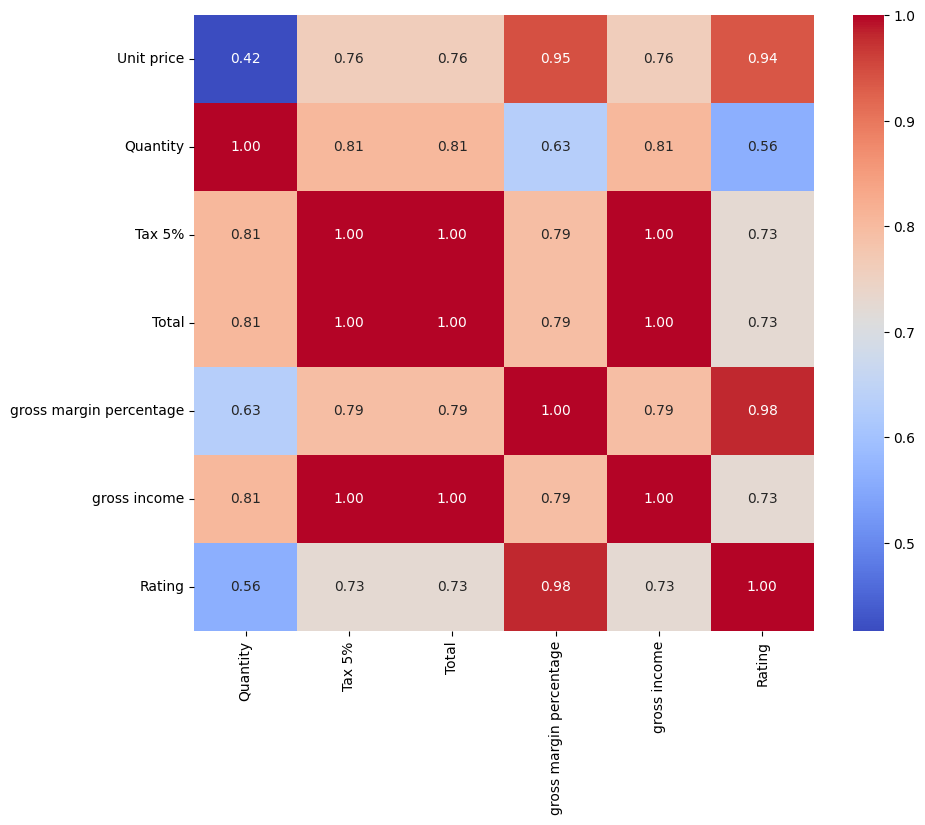

In [212]:
fil2=df.groupby("Product line")[numeric_columns].sum().reset_index()
fig9, ax9 = plt.subplots(figsize=(10, 8))
fil2=fil2[numeric_columns].corr()
fil2=fil2.drop(columns='Unit price')
sns.heatmap(fil2, annot=True, cmap='coolwarm', fmt=".2f", ax=ax9)
plt.show(fig9)

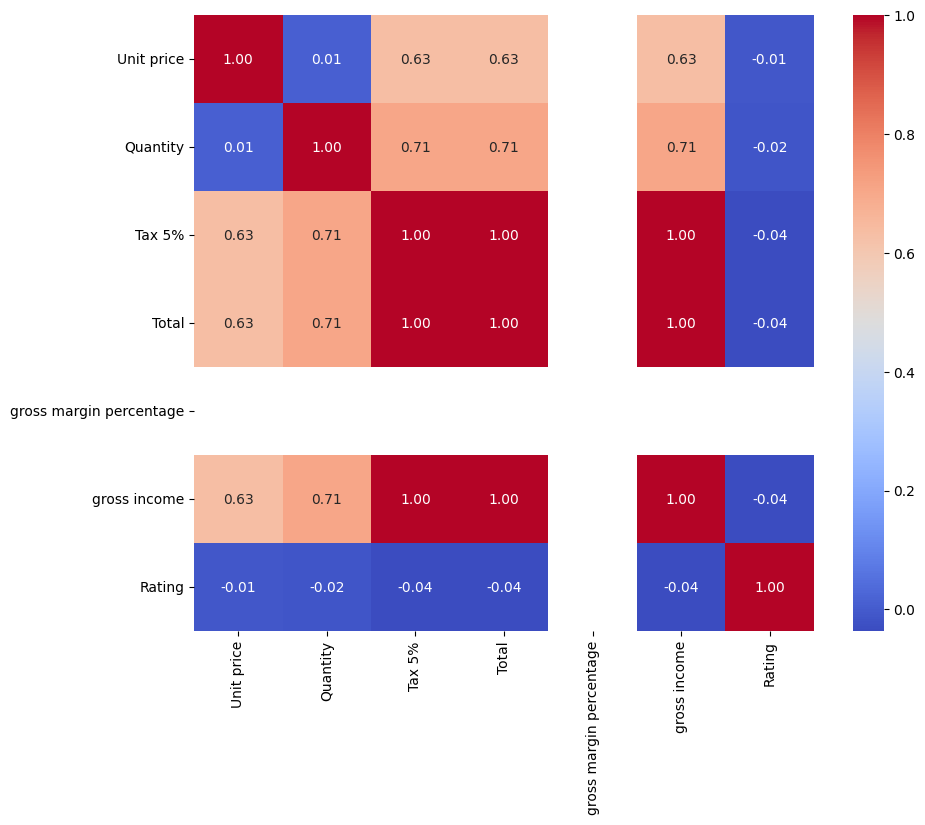

In [196]:
st.subheader("Graph 9: Correlation Matrix")
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
# Plot the heatmap
fig9, ax9 = plt.subplots(figsize=(10, 8))

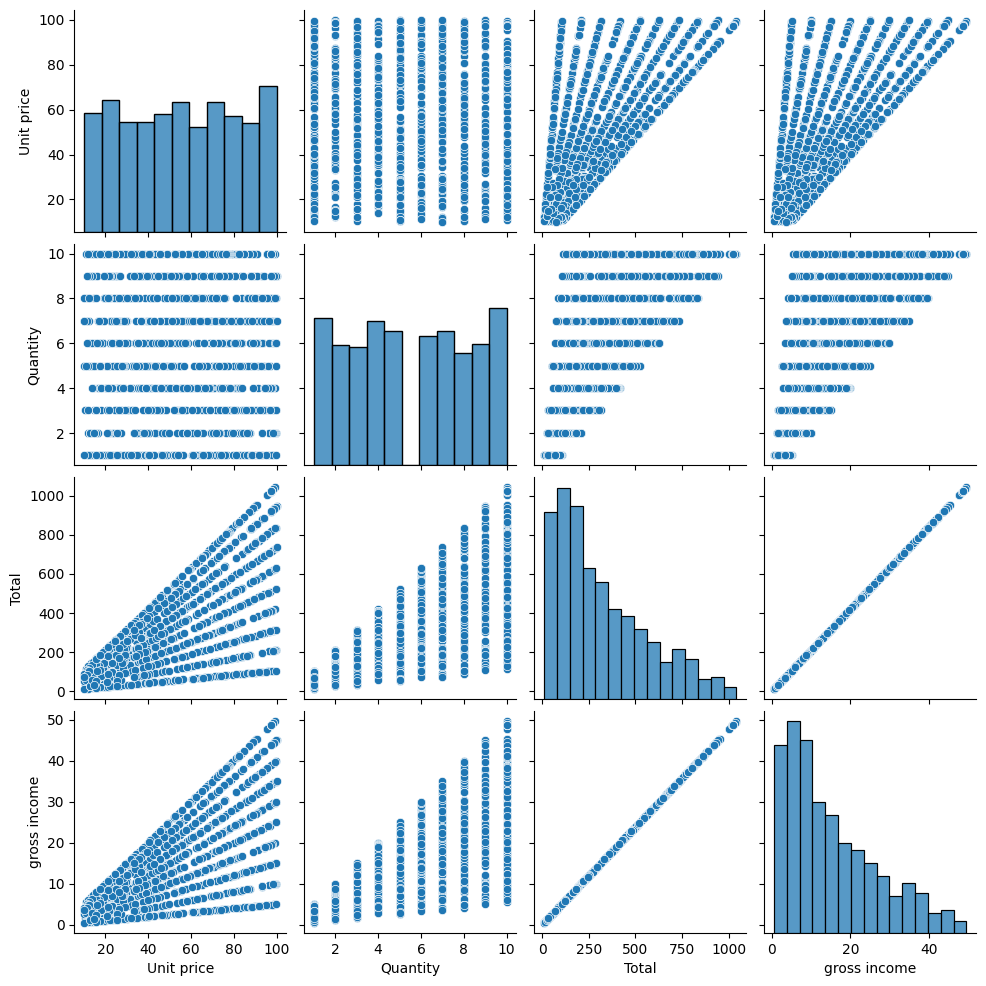

In [213]:
fig10 = sns.pairplot(df[['Unit price', 'Quantity', 'Total', 'gross income']])
plt.show(fig10)